<a href="https://colab.research.google.com/github/JayasreeThyadi/Co_War/blob/main/district.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded=files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
import seaborn
import statsmodels.api as sm
import pylab as py
import plotly.graph_objects as go 
df=pd.read_csv("district_level_latest.csv")
df


Saving district_level_latest.csv to district_level_latest.csv


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased,District_Notes,Last_Updated
0,0,UN,State Unassigned,UN_Unassigned,Unassigned,0,0,0,0,0,0,0,0,0,NaN,NaN
1,1,AN,Andaman and Nicobar Islands,AN_Nicobars,Nicobars,0,0,0,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
2,2,AN,Andaman and Nicobar Islands,AN_North and Middle Andaman,North and Middle Andaman,1,0,1,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
3,3,AN,Andaman and Nicobar Islands,AN_South Andaman,South Andaman,51,19,32,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
4,0,AP,Andhra Pradesh,AP_Foreign Evacuees,Foreign Evacuees,434,0,434,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,760,TG,Telangana,TG_Unknown,Unknown,457,-51654,51552,559,0,0,0,0,0,NaN,NaN
796,761,TR,Tripura,TR_Unknown,Unknown,0,0,0,0,0,0,0,0,0,NaN,NaN
797,762,UP,Uttar Pradesh,UP_Unknown,Unknown,0,0,0,0,0,0,0,0,0,NaN,NaN
798,763,UT,Uttarakhand,UT_Unknown,Unknown,0,0,0,0,0,0,0,0,0,NaN,NaN


In [2]:
df1=pd.read_csv("district_level_latest.csv",usecols=['State','District','Confirmed','Active','Recovered','Deceased'])
df1

,State,District,Confirmed,Active,Recovered,Deceased
0,State Unassigned,Unassigned,0,0,0,0
1,Andaman and Nicobar Islands,Nicobars,0,0,0,0
2,Andaman and Nicobar Islands,North and Middle Andaman,1,0,1,0
3,Andaman and Nicobar Islands,South Andaman,51,19,32,0
4,Andhra Pradesh,Foreign Evacuees,434,0,434,0
...,...,...,...,...,...,...
795,Telangana,Unknown,457,-51654,51552,559
796,Tripura,Unknown,0,0,0,0
797,Uttar Pradesh,Unknown,0,0,0,0
798,Uttarakhand,Unknown,0,0,0,0


In [3]:
df1.iloc[:,2:6].apply(np.mean)

Confirmed    2531.76125
Active        757.37500
Recovered    1721.73000
Deceased       52.04750
dtype: float64

**mean for confirmed,active,recovered,deceased cases for all states(all districts)**

In [4]:
df2=df1[df1.State=='Andhra Pradesh']
df2

,State,District,Confirmed,Active,Recovered,Deceased
4,Andhra Pradesh,Foreign Evacuees,434,0,434,0
5,Andhra Pradesh,Anantapur,21173,6768,14263,142
6,Andhra Pradesh,Chittoor,14306,6215,7948,143
7,Andhra Pradesh,East Godavari,27580,12583,14792,205
8,Andhra Pradesh,Guntur,19419,7224,12007,188
9,Andhra Pradesh,Krishna,9042,3012,5832,198
10,Andhra Pradesh,Kurnool,23348,9811,13314,223
11,Andhra Pradesh,Other State,2461,0,2461,0
12,Andhra Pradesh,Prakasam,7256,2846,4324,86
13,Andhra Pradesh,S.P.S. Nellore,10705,5368,5263,74


In [5]:
df2.iloc[:,2:6].apply(np.mean)

Confirmed    12299.3125
Active        5135.3750
Recovered     7054.3750
Deceased       109.5625
dtype: float64

**mean for confirmed,active,recovered,deceased cases only for Andhra Pradesh**

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 10 Text major ticklabel objects>)

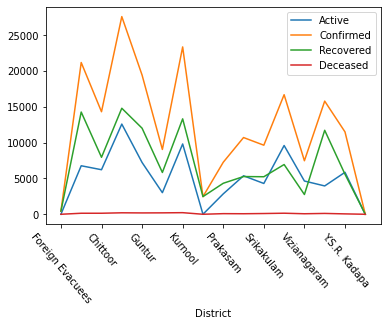

In [6]:
%matplotlib inline
df2.plot(x="District",y=["Active","Confirmed","Recovered","Deceased"])
plt.xticks(rotation=-50)

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 10 Text major ticklabel objects>)

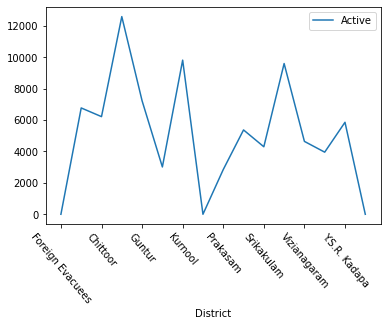

In [7]:
%matplotlib inline
df2.plot(x="District",y=["Active"])
plt.xticks(rotation=-50)

In [8]:
fig=px.line(data_frame=df2,x="District",y="Active")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [9]:
df2.iloc[:,3:4].apply(np.var)

Active    1.232473e+07
dtype: float64

In [10]:
df2.iloc[:,3:4].apply(np.std)

Active    3510.659533
dtype: float64

In [11]:
df2.iloc[:,3:4].apply(np.mean)

Active    5135.375
dtype: float64

In [12]:
active_list=df2["Active"].tolist()
active_list

[0,
 6768,
 6215,
 12583,
 7224,
 3012,
 9811,
 0,
 2846,
 5368,
 4297,
 9595,
 4639,
 3953,
 5855,
 0]

In [13]:
data=np.array([0,6768,6215,12583,7224,3012,9811,0,2846,5368,4297,9595,4639,3953,5855,0])
stats.zscore(data)

array([-1.46279494,  0.46504794,  0.30752769,  2.12143186,  0.59493807,
       -0.60483649,  1.33183664, -1.46279494, -0.65212106,  0.06626248,
       -0.2388084 ,  1.27030974, -0.14139081, -0.33679569,  0.20498285,
       -1.46279494])

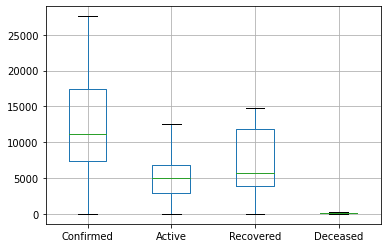

In [14]:
df2.boxplot(column=["Confirmed","Active","Recovered","Deceased"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7dec8dea10>]],
      dtype=object)

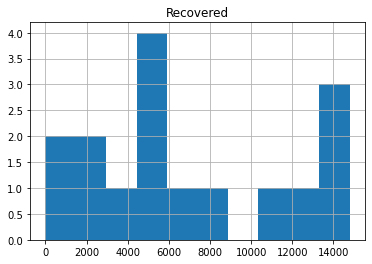

In [15]:
df2.hist(column="Recovered")

[[1.         0.96180384]
 [0.96180384 1.        ]]


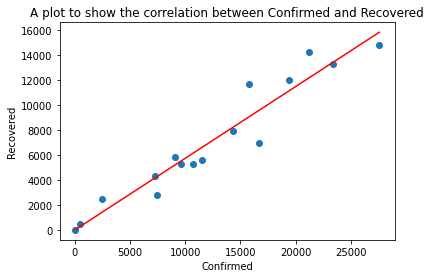

In [16]:
x=df2["Confirmed"]
y=df2["Recovered"]
print(np.corrcoef(x,y))
plt.scatter(x,y)
plt.title('A plot to show the correlation between Confirmed and Recovered')
plt.xlabel('Confirmed')
plt.ylabel('Recovered')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')
plt.show()

[[1.         0.79603547]
 [0.79603547 1.        ]]


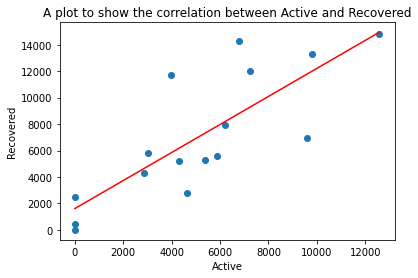

In [17]:
x=df2["Active"]
y=df2["Recovered"]
print(np.corrcoef(x,y))
plt.scatter(x,y)
plt.title('A plot to show the correlation between Active and Recovered')
plt.xlabel('Active')
plt.ylabel('Recovered')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')
plt.show()

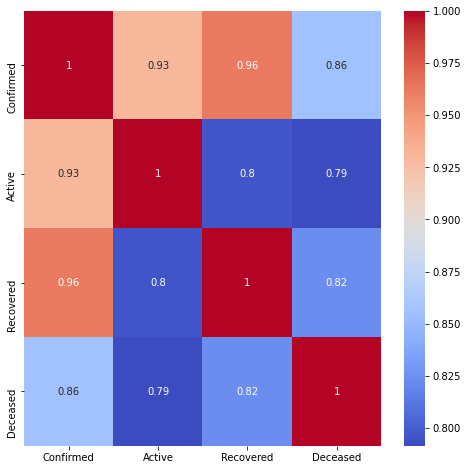

In [18]:
plt.figure(figsize=(8,8))
seaborn.heatmap(df2.corr(),annot=True,cmap='coolwarm')

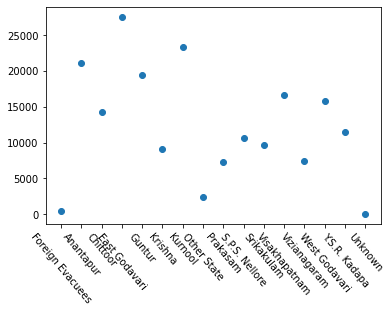

In [19]:
x=df2["District"]
y=df2["Confirmed"]
plt.scatter(x,y)
plt.xticks(rotation=-50)
plt.show()

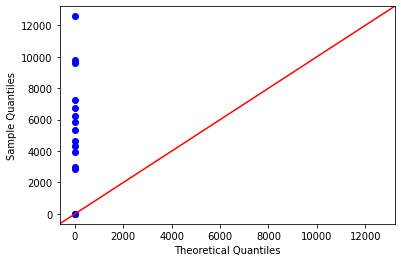

In [20]:
data_points=df2['Active']
sm.qqplot(data_points,line='45')
py.show()

In [21]:
df4=pd.read_csv("district_level_latest.csv",usecols=['District_Key','District','Confirmed','Active','Recovered','Deceased'])
df4

,District_Key,District,Confirmed,Active,Recovered,Deceased
0,UN_Unassigned,Unassigned,0,0,0,0
1,AN_Nicobars,Nicobars,0,0,0,0
2,AN_North and Middle Andaman,North and Middle Andaman,1,0,1,0
3,AN_South Andaman,South Andaman,51,19,32,0
4,AP_Foreign Evacuees,Foreign Evacuees,434,0,434,0
...,...,...,...,...,...,...
795,TG_Unknown,Unknown,457,-51654,51552,559
796,TR_Unknown,Unknown,0,0,0,0
797,UP_Unknown,Unknown,0,0,0,0
798,UT_Unknown,Unknown,0,0,0,0


In [22]:
top5_confirmed_all = pd.DataFrame(df4.groupby('District_Key')['Confirmed'].sum().nlargest(5).sort_values(ascending = False))
fig01 = px.scatter(top5_confirmed_all, x = top5_confirmed_all.index, y = 'Confirmed', size = 'Confirmed', size_max = 120,
                color = top5_confirmed_all.index, title = 'Top 5 Confirmed Cases Districts in India')
fig01.show()

In [23]:
top5_active_all = pd.DataFrame(df4.groupby('District_Key')['Active'].sum().nlargest(5).sort_values(ascending = False))
fig02 = px.scatter(top5_active_all, x = top5_active_all.index, y = 'Active', size = 'Active', size_max = 120,
                color = top5_active_all.index, title = 'Top 5 Active Cases Districts in India')
fig02.show()

In [24]:
top5_deceased_all = pd.DataFrame(df4.groupby('District_Key')['Deceased'].sum().nlargest(5).sort_values(ascending = True))
fig03 = px.bar(top5_deceased_all, x = 'Deceased', y = top5_deceased_all.index, height = 600, color = 'Deceased', orientation = 'h',
            color_continuous_scale = ['deepskyblue','red'], title = 'Top 5 Deceased Cases Districts in India')
fig03.show()

In [25]:
top5_recovered_all = pd.DataFrame(df4.groupby('District_Key')['Recovered'].sum().nlargest(5).sort_values(ascending = False))
fig04 = px.bar(top5_recovered_all, x = top5_recovered_all.index, y = 'Recovered', height = 600, color = 'Recovered',
             title = 'Top 5 Recovered Cases Districts in India', color_continuous_scale = px.colors.sequential.Viridis)
fig04.show()

In [26]:
top5_confirmed = pd.DataFrame(df.groupby('State')['Confirmed'].sum().nlargest(5).sort_values(ascending = False))
fig1 = px.scatter(top5_confirmed, x = top5_confirmed.index, y = 'Confirmed', size = 'Confirmed', size_max = 120,
                color = top5_confirmed.index, title = 'Top 5 Confirmed Cases States')
fig1.show()

In [27]:
top5_active = pd.DataFrame(df.groupby('State')['Active'].sum().nlargest(5).sort_values(ascending = False))
fig2 = px.scatter(top5_active, x = top5_active.index, y = 'Active', size = 'Active', size_max = 120,
                color = top5_active.index, title = 'Top 5 Active Cases States')
fig2.show()

In [28]:
top5_deceased = pd.DataFrame(df.groupby('State')['Deceased'].sum().nlargest(5).sort_values(ascending = True))
fig3 = px.bar(top5_deceased, x = 'Deceased', y = top5_deceased.index, height = 600, color = 'Deceased', orientation = 'h',
            color_continuous_scale = ['deepskyblue','red'], title = 'Top 5 Deceased Cases States')
fig3.show()

In [29]:
top5_recovered = pd.DataFrame(df.groupby('State')['Recovered'].sum().nlargest(5).sort_values(ascending = False))
fig4 = px.bar(top5_recovered, x = top5_recovered.index, y = 'Recovered', height = 600, color = 'Recovered',
             title = 'Top 5 Recovered Cases States', color_continuous_scale = px.colors.sequential.Viridis)
fig4.show()

In [30]:
df3=df1[df1.State=='Maharashtra']
df3

,State,District,Confirmed,Active,Recovered,Deceased
330,Maharashtra,Ahmednagar,7440,3260,4094,86
331,Maharashtra,Akola,2815,515,2172,127
332,Maharashtra,Amravati,2557,815,1665,77
333,Maharashtra,Aurangabad,15218,4545,10143,530
334,Maharashtra,Beed,1187,783,379,25
335,Maharashtra,Bhandara,318,90,226,2
336,Maharashtra,Buldhana,1663,693,924,46
337,Maharashtra,Chandrapur,642,321,320,1
338,Maharashtra,Dhule,3470,1098,2255,115
339,Maharashtra,Gadchiroli,360,100,259,1


In [31]:
df5=df1[df1.State=='Tamil Nadu']
df5

,State,District,Confirmed,Active,Recovered,Deceased
604,Tamil Nadu,Railway Quarantine,426,2,424,0
605,Tamil Nadu,Airport Quarantine,1527,327,1199,1
606,Tamil Nadu,Other State,0,-3,0,3
607,Tamil Nadu,Ariyalur,1154,218,926,10
608,Tamil Nadu,Chengalpattu,16897,2644,13969,284
609,Tamil Nadu,Chennai,106096,11723,92128,2245
610,Tamil Nadu,Coimbatore,5997,1579,4322,96
611,Tamil Nadu,Cuddalore,4232,1912,2271,49
612,Tamil Nadu,Dharmapuri,815,86,722,7
613,Tamil Nadu,Dindigul,3331,561,2707,63


In [32]:
df6=df1[df1.State=='Karnataka']
df6

,State,District,Confirmed,Active,Recovered,Deceased
281,Karnataka,Bagalkote,2614,1429,1134,51
282,Karnataka,Ballari,8700,4313,4299,88
283,Karnataka,Belagavi,4466,3197,1178,91
284,Karnataka,Bengaluru Rural,2615,1829,776,10
285,Karnataka,Bengaluru Urban,67425,32314,33932,1178
286,Karnataka,Bidar,2712,816,1803,90
287,Karnataka,Chamarajanagara,985,405,566,14
288,Karnataka,Chikkaballapura,2370,964,1364,41
289,Karnataka,Chikkamagaluru,1306,716,565,25
290,Karnataka,Chitradurga,885,422,451,12


In [33]:
df7=df[df.State=='Delhi']
df7

,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased,District_Notes,Last_Updated
147,144,DL,Delhi,DL_Central Delhi,Central Delhi,184,184,0,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
148,145,DL,Delhi,DL_East Delhi,East Delhi,38,38,0,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
149,146,DL,Delhi,DL_New Delhi,New Delhi,37,37,0,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
150,147,DL,Delhi,DL_North Delhi,North Delhi,60,60,0,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
151,148,DL,Delhi,DL_North East Delhi,North East Delhi,25,25,0,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
152,149,DL,Delhi,DL_North West Delhi,North West Delhi,32,31,0,1,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
153,150,DL,Delhi,DL_Shahdara,Shahdara,48,48,0,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
154,151,DL,Delhi,DL_South Delhi,South Delhi,70,70,0,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
155,152,DL,Delhi,DL_South East Delhi,South East Delhi,130,130,0,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
156,153,DL,Delhi,DL_South West Delhi,South West Delhi,42,42,0,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN


In [34]:
df8=df1[df1.State=='Uttar Pradesh']
df8

,State,District,Confirmed,Active,Recovered,Deceased
652,Uttar Pradesh,Agra,1985,293,1592,100
653,Uttar Pradesh,Aligarh,1808,1050,732,26
654,Uttar Pradesh,Ambedkar Nagar,346,140,195,11
655,Uttar Pradesh,Amethi,529,111,416,2
656,Uttar Pradesh,Amroha,780,356,413,11
...,...,...,...,...,...,...
723,Uttar Pradesh,Sonbhadra,770,371,399,0
724,Uttar Pradesh,Sultanpur,954,415,518,21
725,Uttar Pradesh,Unnao,1023,487,520,16
726,Uttar Pradesh,Varanasi,3831,1867,1872,92


In [35]:
df9=df1[df1.State=='Gujarat']
df9

,State,District,Confirmed,Active,Recovered,Deceased
165,Gujarat,Other State,119,35,83,1
166,Gujarat,Ahmedabad,27434,3660,22152,1622
167,Gujarat,Amreli,570,237,324,9
168,Gujarat,Anand,538,50,475,13
169,Gujarat,Aravalli,321,26,271,24
170,Gujarat,Banaskantha,769,0,752,17
171,Gujarat,Bharuch,983,215,757,11
172,Gujarat,Bhavnagar,1689,397,1264,28
173,Gujarat,Botad,319,103,211,5
174,Gujarat,Chhota Udaipur,178,19,157,2


In [36]:
top5_confirmed_dis_maha = pd.DataFrame(df3.groupby('District')['Confirmed'].sum().nlargest(5).sort_values(ascending = False))
figg1 = px.scatter(top5_confirmed_dis_maha, x = top5_confirmed_dis_maha.index, y = 'Confirmed', size = 'Confirmed', size_max = 120,
                color = top5_confirmed_dis_maha.index, title = 'Top 5 District Confirmed Cases in Maharashtra')
figg1.show()

In [37]:
top5_confirmed_dis_tam = pd.DataFrame(df5.groupby('District')['Confirmed'].sum().nlargest(5).sort_values(ascending = False))
figg01 = px.scatter(top5_confirmed_dis_tam, x = top5_confirmed_dis_tam.index, y = 'Confirmed', size = 'Confirmed', size_max = 120,
                color = top5_confirmed_dis_tam.index, title = 'Top 5 District Confirmed Cases in Tamil Nadu')
figg01.show()

In [38]:
top5_confirmed_dis_andh = pd.DataFrame(df2.groupby('District')['Confirmed'].sum().nlargest(5).sort_values(ascending = False))
figg001 = px.scatter(top5_confirmed_dis_andh, x = top5_confirmed_dis_andh.index, y = 'Confirmed', size = 'Confirmed', size_max = 120,
                color = top5_confirmed_dis_andh.index, title = 'Top 5 District Confirmed Cases in Andhra Pradesh')
figg001.show()

In [39]:
top5_confirmed_dis_karna = pd.DataFrame(df6.groupby('District')['Confirmed'].sum().nlargest(5).sort_values(ascending = False))
figg0001 = px.scatter(top5_confirmed_dis_karna, x = top5_confirmed_dis_karna.index, y = 'Confirmed', size = 'Confirmed', size_max = 120,
                color = top5_confirmed_dis_karna.index, title = 'Top 5 District Confirmed Cases in Karnataka')
figg0001.show()

In [40]:
top5_confirmed_dis_delhi = pd.DataFrame(df7.groupby('District_Key')['Confirmed'].sum().nlargest(5).sort_values(ascending = False))
figg00001= px.scatter(top5_confirmed_dis_delhi, x = top5_confirmed_dis_delhi.index, y = 'Confirmed', size = 'Confirmed', size_max = 120,
                color = top5_confirmed_dis_delhi.index, title = 'Top 5 District Confirmed Cases in Delhi')
figg00001.show()

In [41]:
top5_active_dis_maha = pd.DataFrame(df3.groupby('District')['Active'].sum().nlargest(5).sort_values(ascending = False))
figg2 = px.scatter(top5_active_dis_maha, x = top5_active_dis_maha.index, y = 'Active', size = 'Active', size_max = 120,
                color = top5_active_dis_maha.index, title = 'Top 5 District Active Cases in Maharashtra')
figg2.show()

In [42]:
top5_active_dis_andh = pd.DataFrame(df2.groupby('District')['Active'].sum().nlargest(5).sort_values(ascending = False))
figg02 = px.scatter(top5_active_dis_andh, x = top5_active_dis_andh.index, y = 'Active', size = 'Active', size_max = 120,
                color = top5_active_dis_andh.index, title = 'Top 5 District Active Cases in Andhra Pradesh')
figg02.show()

In [43]:
top5_active_dis_karna = pd.DataFrame(df6.groupby('District')['Active'].sum().nlargest(5).sort_values(ascending = False))
figg002 = px.scatter(top5_active_dis_karna, x = top5_active_dis_karna.index, y = 'Active', size = 'Active', size_max = 120,
                color = top5_active_dis_karna.index, title = 'Top 5 District Active Cases in Karnataka')
figg002.show()

In [44]:
top5_active_dis_tam = pd.DataFrame(df5.groupby('District')['Active'].sum().nlargest(5).sort_values(ascending = False))
figg0002= px.scatter(top5_active_dis_tam, x = top5_active_dis_tam.index, y = 'Active', size = 'Active', size_max = 120,
                color = top5_active_dis_tam.index, title = 'Top 5 District Active Cases in Tamil Nadu')
figg0002.show()

In [45]:
top5_active_dis_uttar = pd.DataFrame(df8.groupby('District')['Active'].sum().nlargest(5).sort_values(ascending = False))
figg00002= px.scatter(top5_active_dis_uttar, x = top5_active_dis_uttar.index, y = 'Active', size = 'Active', size_max = 120,
                color = top5_active_dis_uttar.index, title = 'Top 5 District Active Cases in Uttar Pradesh')
figg00002.show()

In [46]:
top5_deceased_dis_maha= pd.DataFrame(df3.groupby('District')['Deceased'].sum().nlargest(5).sort_values(ascending = True))
figg3 = px.bar(top5_deceased_dis_maha, x = 'Deceased', y = top5_deceased_dis_maha.index, height = 600, color = 'Deceased', orientation = 'h',
            color_continuous_scale = ['deepskyblue','red'], title = 'Top 5 District Deceased Cases in Maharashtra')
figg3.show()

In [47]:
top5_deceased_dis_tam= pd.DataFrame(df5.groupby('District')['Deceased'].sum().nlargest(5).sort_values(ascending = True))
figg03 = px.bar(top5_deceased_dis_tam, x = 'Deceased', y = top5_deceased_dis_tam.index, height = 600, color = 'Deceased', orientation = 'h',
            color_continuous_scale = ['deepskyblue','red'], title = 'Top 5 District Deceased Cases in Tamil Nadu')
figg03.show()

In [48]:
top5_deceased_dis_delhi= pd.DataFrame(df7.groupby('District_Key')['Deceased'].sum().nlargest(5).sort_values(ascending = True))
figg003 = px.bar(top5_deceased_dis_delhi, x = 'Deceased', y = top5_deceased_dis_delhi.index, height = 600, color = 'Deceased', orientation = 'h',
            color_continuous_scale = ['deepskyblue','red'], title = 'Top 5 District Deceased Cases in Delhi')
figg003.show()

In [49]:
top5_deceased_dis_karna= pd.DataFrame(df6.groupby('District')['Deceased'].sum().nlargest(5).sort_values(ascending = True))
figg0003 = px.bar(top5_deceased_dis_karna, x = 'Deceased', y = top5_deceased_dis_karna.index, height = 600, color = 'Deceased', orientation = 'h',
            color_continuous_scale = ['deepskyblue','red'], title = 'Top 5 District Deceased Cases in Karnataka')
figg0003.show()

In [50]:
top5_deceased_dis_guja= pd.DataFrame(df9.groupby('District')['Deceased'].sum().nlargest(5).sort_values(ascending = True))
figg00003 = px.bar(top5_deceased_dis_guja, x = 'Deceased', y = top5_deceased_dis_guja.index, height = 600, color = 'Deceased', orientation = 'h',
            color_continuous_scale = ['deepskyblue','red'], title = 'Top 5 District Deceased Cases in Gujarat')
figg00003.show()

In [51]:
top5_recovered_dis_maha = pd.DataFrame(df3.groupby('District')['Recovered'].sum().nlargest(5).sort_values(ascending = False))
figg4 = px.bar(top5_recovered_dis_maha, x = top5_recovered_dis_maha.index, y = 'Recovered', height = 600, color = 'Recovered',
             title = 'Top 5 District Recovered Cases in Maharashtra', color_continuous_scale = px.colors.sequential.Viridis)
figg4.show()

In [52]:
top5_recovered_dis_tam = pd.DataFrame(df5.groupby('District')['Recovered'].sum().nlargest(5).sort_values(ascending = False))
figg04 = px.bar(top5_recovered_dis_tam, x = top5_recovered_dis_tam.index, y = 'Recovered', height = 600, color = 'Recovered',
             title = 'Top 5 District Recovered Cases in Tamil Nadu', color_continuous_scale = px.colors.sequential.Viridis)
figg04.show()

In [53]:
top5_recovered_dis_delhi = pd.DataFrame(df7.groupby('District_Key')['Recovered'].sum().nlargest(5).sort_values(ascending = False))
figg004 = px.bar(top5_recovered_dis_delhi, x = top5_recovered_dis_delhi.index, y = 'Recovered', height = 600, color = 'Recovered',
             title = 'Top 5 District Recovered Cases in Delhi', color_continuous_scale = px.colors.sequential.Viridis)
figg004.show()

In [54]:
top5_recovered_dis_andh = pd.DataFrame(df2.groupby('District')['Recovered'].sum().nlargest(5).sort_values(ascending = False))
figg0004 = px.bar(top5_recovered_dis_andh, x = top5_recovered_dis_andh.index, y = 'Recovered', height = 600, color = 'Recovered',
             title = 'Top 5 District Recovered Cases in Andhra Pradesh', color_continuous_scale = px.colors.sequential.Viridis)
figg0004.show()

In [55]:
top5_recovered_dis_karna = pd.DataFrame(df6.groupby('District')['Recovered'].sum().nlargest(5).sort_values(ascending = False))
figg00004 = px.bar(top5_recovered_dis_karna, x = top5_recovered_dis_karna.index, y = 'Recovered', height = 600, color = 'Recovered',
             title = 'Top 5 District Recovered Cases in Karnataka', color_continuous_scale = px.colors.sequential.Viridis)
figg00004.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36],
 <a list of 37 Text major ticklabel objects>)

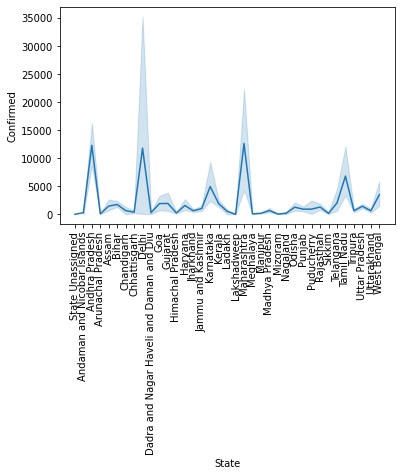

In [56]:
seaborn.lineplot(data=df1,x="State",y="Confirmed",size_norm=(12,12))
plt.xticks(rotation=90)

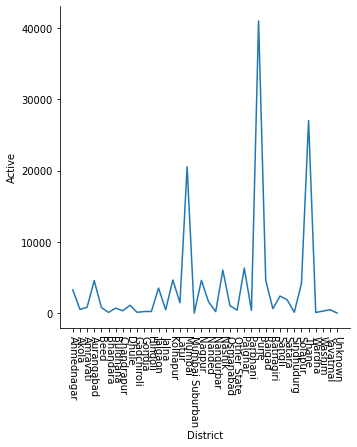

In [57]:
seaborn.relplot(data=df3,x="District",y="Active",kind="line")
plt.xticks(rotation=-90)
plt.rcParams['figure.figsize'] = (40,15)

**Correlogram;Correlogram is used to visually see the correlation metric between all possible pairs of numeric variables in a given dataframe**

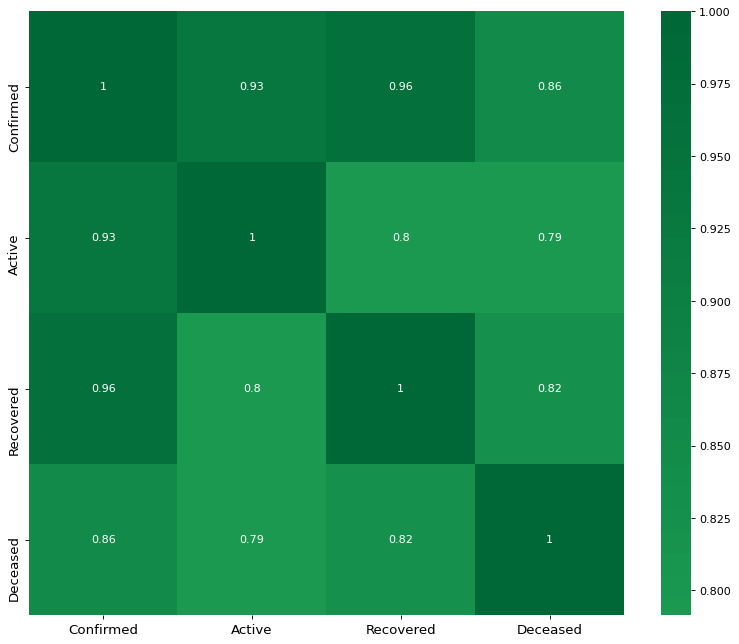

In [58]:
plt.figure(figsize=(12,10), dpi= 80)
seaborn.heatmap(df2.corr(), xticklabels=df2.corr().columns, yticklabels=df2.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

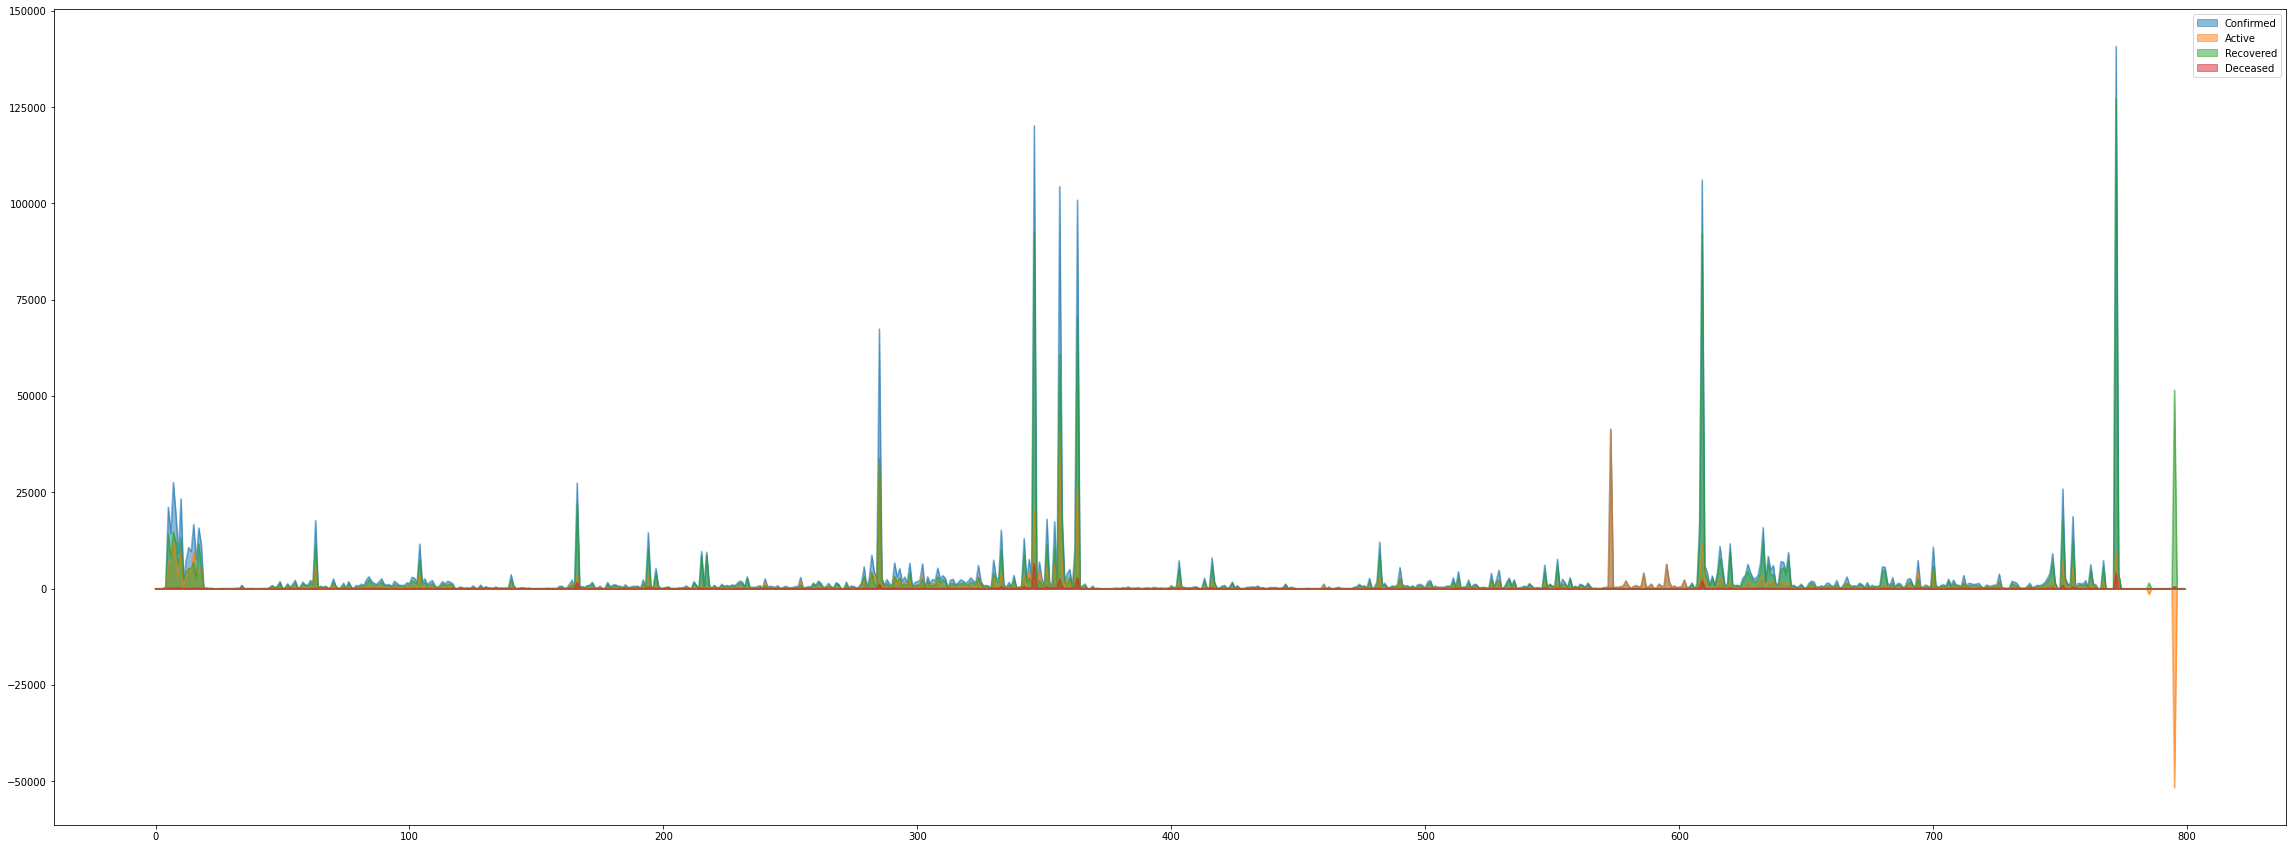

In [59]:
df1.plot(kind='area', stacked=False)
plt.show(block=True)

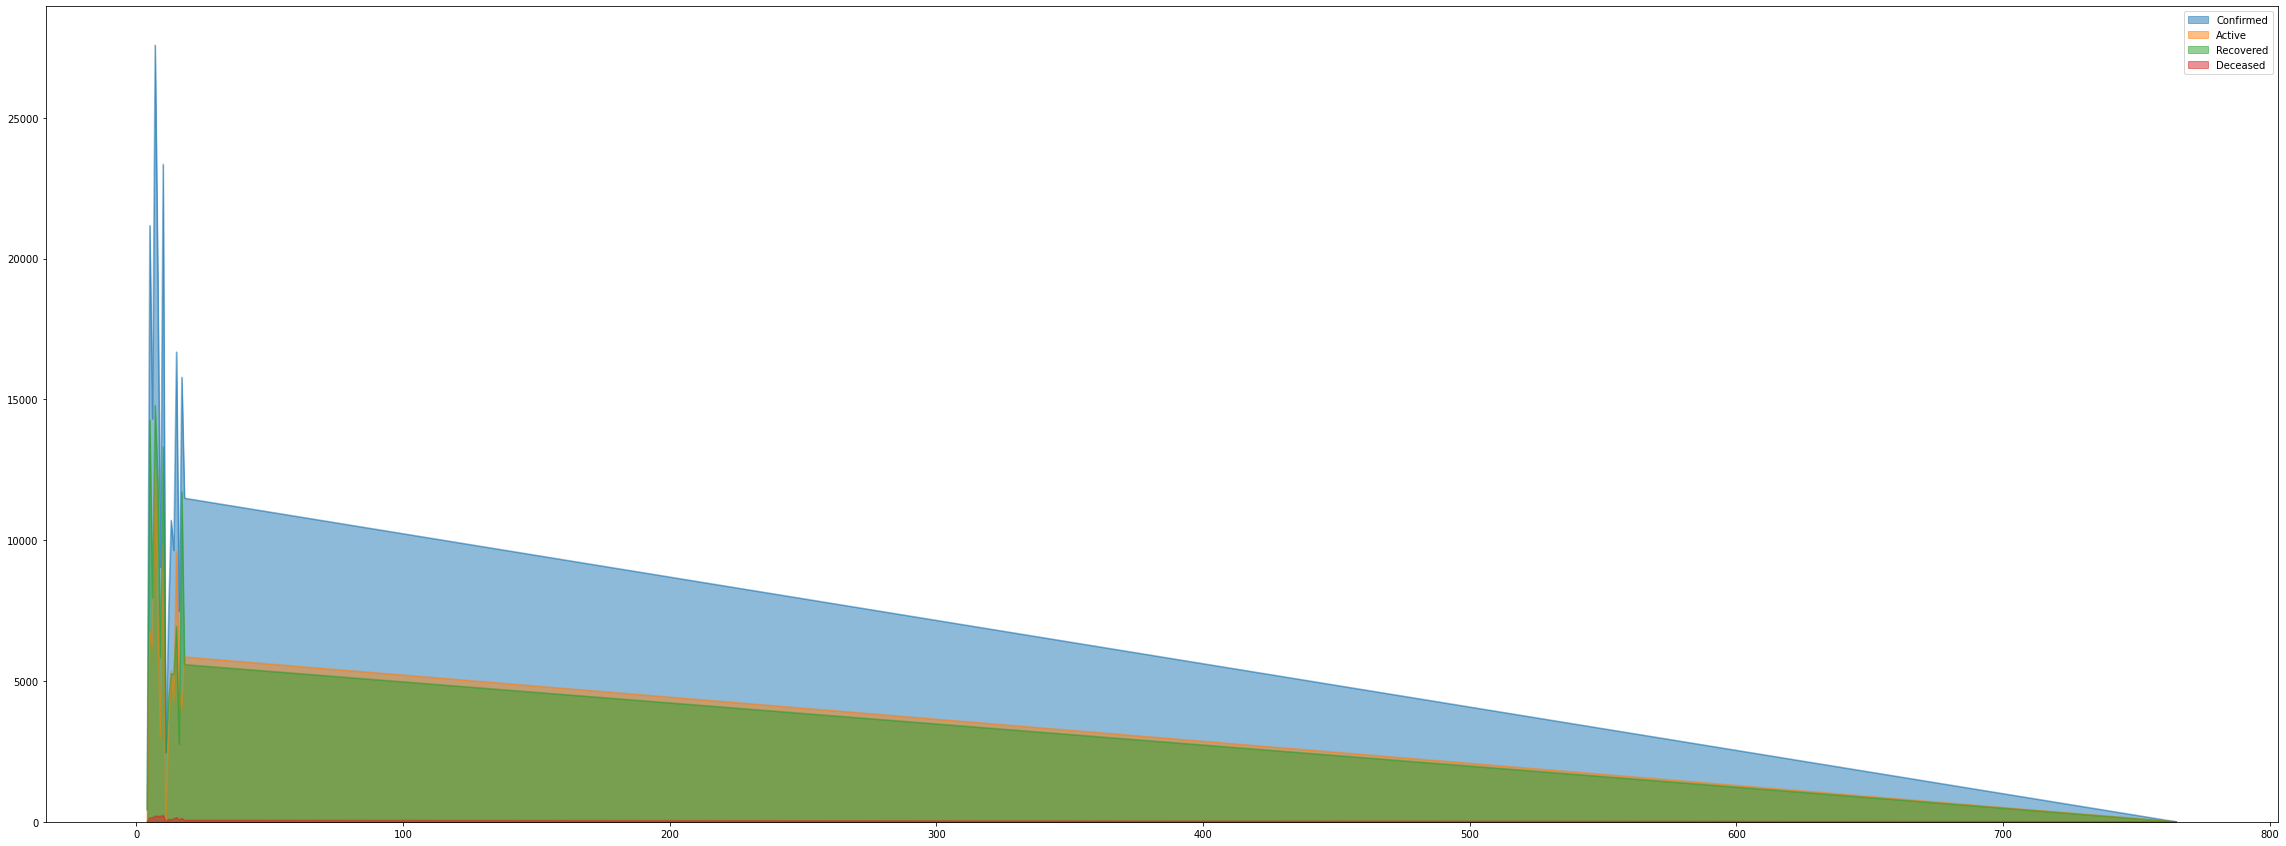

In [60]:
df2.plot(kind='area', stacked=False)
plt.show(block=True)

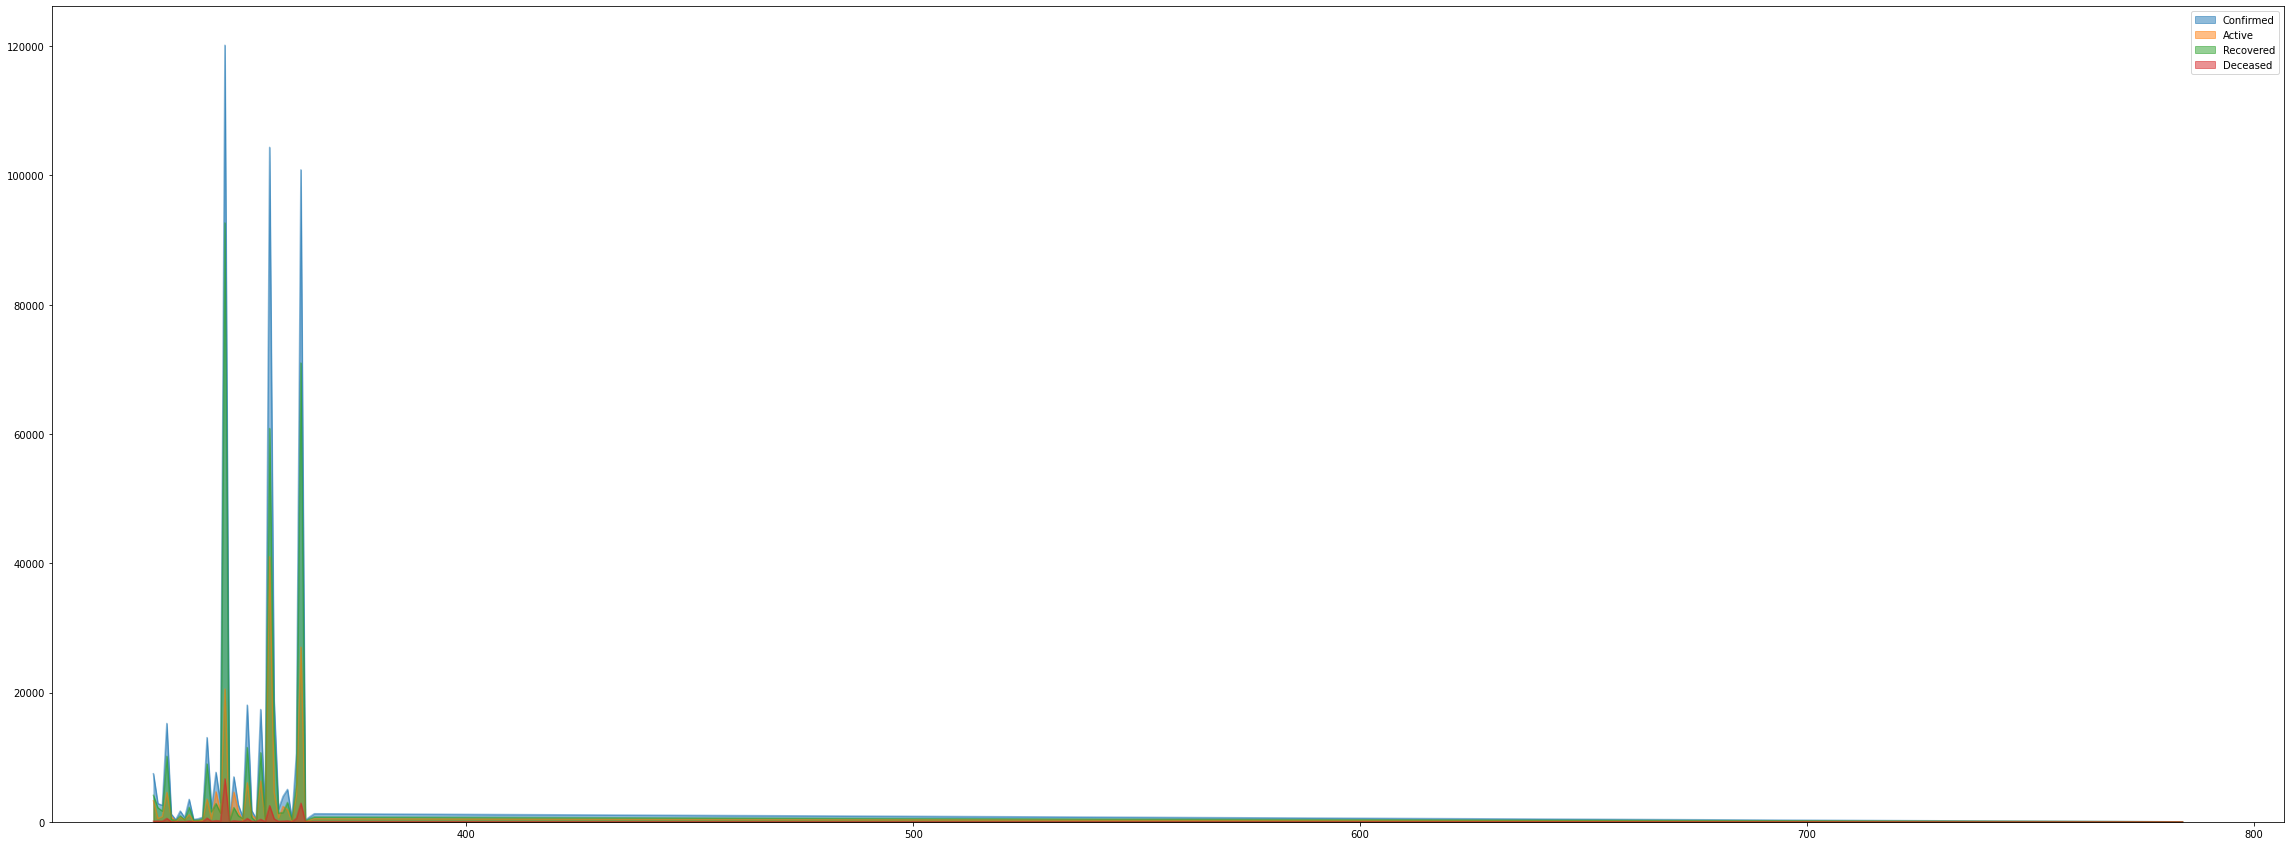

In [61]:
df3.plot(kind='area', stacked=False)
plt.show(block=True)

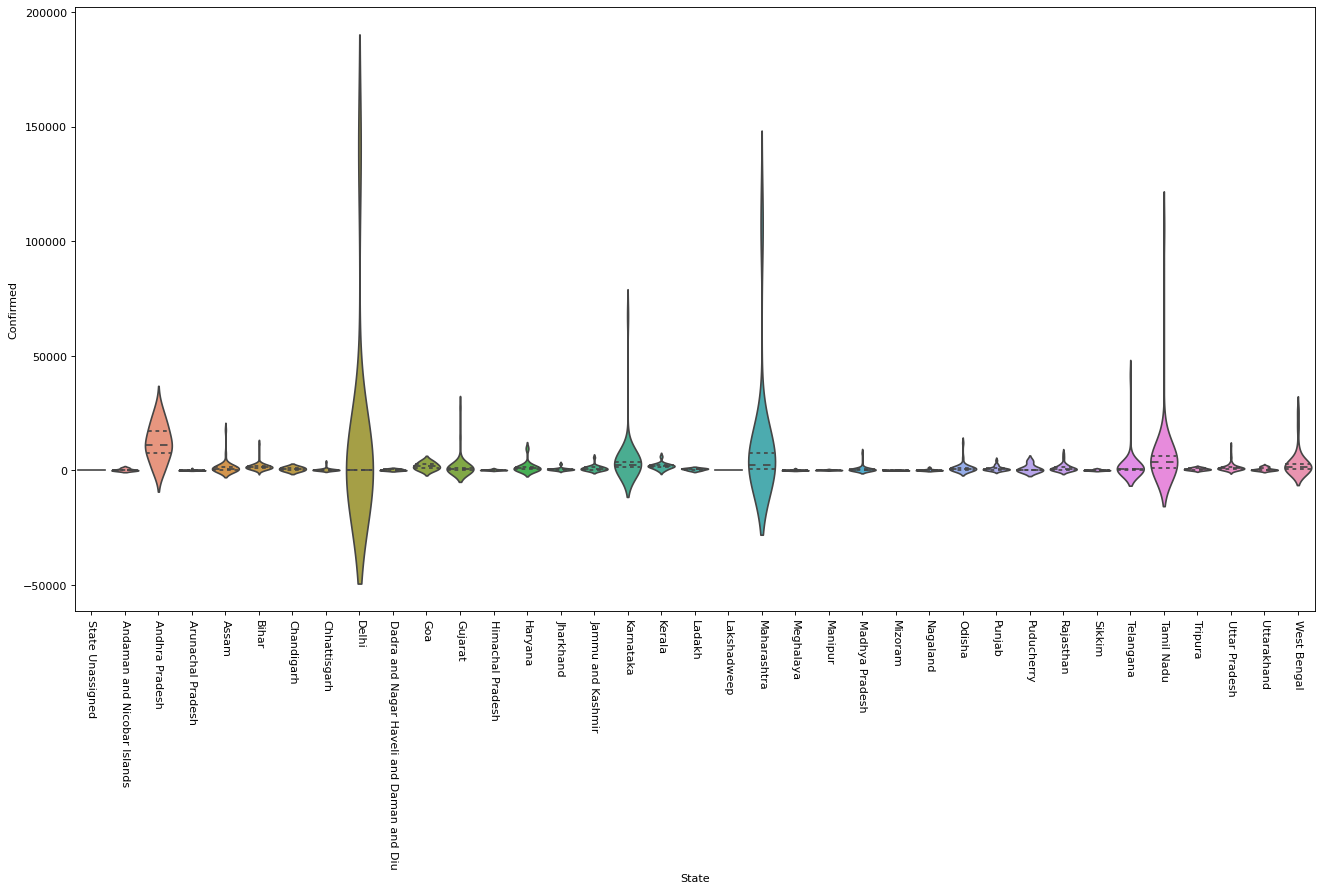

In [62]:
plt.figure(figsize=(20,10), dpi= 80)
seaborn.violinplot(x='State', y='Confirmed', data=df1, scale='width', inner='quartile')
plt.xticks(rotation=-90)
plt.show()

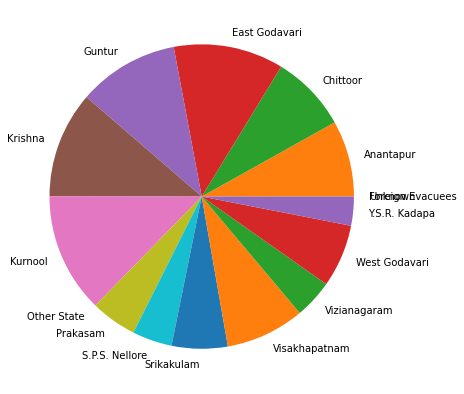

In [63]:
figg=plt.figure(figsize=(10,7))
plt.pie(df2["Deceased"],labels=df2["District"])
plt.show()